In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
path = 'D:/Google_Download/andrew_ml_ex22391/ex2data1.txt'
df = pd.read_csv(path)
df.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


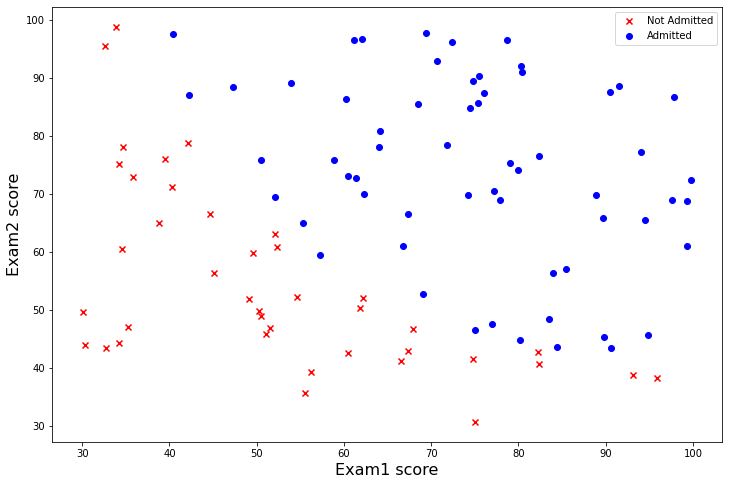

In [3]:
# 根据这些点进行绘图
plt.figure(figsize=(12,8))
df1 = df[df.iloc[:,2] == 0]
df2 = df[df.iloc[:,2] == 1]
plt.scatter(df1.iloc[:,0].tolist(),df1.iloc[:,1].tolist(),color='r',marker='x',label='Not Admitted')
plt.scatter(df2.iloc[:,0].tolist(),df2.iloc[:,1].tolist(),color='b',marker='o',label='Admitted')
plt.legend(loc='best')
plt.xlabel('Exam1 score',size=16)
plt.ylabel('Exam2 score',size=16)
plt.show()


In [4]:
# 定义sigmoid函数
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

# 测试sigmoid函数
sigmoid(np.matrix([0,1,-1]))

matrix([[0.5       , 0.73105858, 0.26894142]])

In [5]:
def Cost(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = -y.T*(np.log(sigmoid(X*theta.T)))
    second = (y.T-1)*(np.log(1-(sigmoid(X*theta.T))))
    return (first+second)/X.shape[0]

In [6]:
# 构造数据，为什么之前构造数据不对呢？
# y = df.iloc[:,-1]这种写法得出的数据是一行多列
columns = df.shape[1]
X = df.iloc[:,0:columns-1]
y = df.iloc[:,columns-1:columns]
# 将X数据第一列插入1
X.insert(0,'Ones',1)

# 转化数据类型
X = np.array(X.values)
y = np.array(y.values)

In [7]:
theta = np.zeros(3)
g = Cost(theta,X,y)
g

matrix([[0.69314718]])

In [8]:
# 给出导数即可，可以使用scipy函数库来进行求解
def gradientDescent(theta,X,y):
    # 规范化数据
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    grad = np.zeros(theta.shape)
    error = sigmoid(X*theta.T)-y
    term = np.multiply(error,X)
    grad = np.sum(term,axis=0)/X.shape[0]
    return grad

In [9]:
# t = gradientDescent(theta,X,y)
# t
# 使用包提供的自动梯度下降函数，需要提供Cost代价函数，
result = opt.fmin_tnc(func=Cost,x0=theta,fprime=gradientDescent,args=(X,y))
result
# 其中result的后两个数据，36代表调用代价函数的次数，该次数往往大于迭代次数，0代表代码执行状态

(array([-25.16131852,   0.20623159,   0.20147148]), 36, 0)

In [10]:
c = Cost(result[0],X,y)
# 打印c可以看出此时代价函数最小值接近0
c

matrix([[0.2034977]])

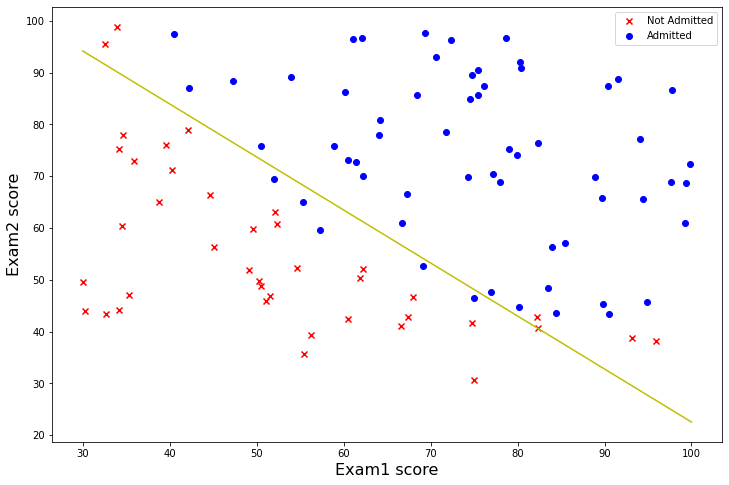

In [11]:
# 画出决策线
_x = np.linspace(30,100,50)
_y = (-result[0][0]-result[0][1]*_x)/result[0][2]
plt.subplots(figsize=(12,8))
plt.plot(_x,_y,'y')
plt.scatter(df1.iloc[:,0].tolist(),df1.iloc[:,1].tolist(),color='r',marker='x',label='Not Admitted')
plt.scatter(df2.iloc[:,0].tolist(),df2.iloc[:,1].tolist(),color='b',marker='o',label='Admitted')
plt.legend(loc='best')
plt.xlabel('Exam1 score',size=16)
plt.ylabel('Exam2 score',size=16)
plt.show()

In [12]:
# 预测学生被录取的概率
def hfunc1(theta,X):
    theta = np.matrix(theta)
    X = np.matrix(X)
    return sigmoid(X.dot(theta.T))
# 输出被录取的概率
hfunc1(result[0],[1,45,85])

matrix([[0.77629062]])

In [13]:
# 计算训练集上的数据预测的准确率
def predict(theta,X):
    theta = np.matrix(theta)
    X = np.matrix(X)
    predicts = sigmoid(X*theta.T)
    return [1 if x>=0.5 else 0 for x in predicts]

In [14]:
predicts = predict(result[0],X)
correct = [1 if (a==0 and b==0) or (a==1 and b==1) else 0 for a,b in zip(predicts,y)]
accuracy = sum(correct)/len(correct)
print('accuracy = {:.0%}'.format(accuracy))

accuracy = 89%


In [15]:
# 正则化处理逻辑回归
# 如果文件开头没有名字，则读取方式为df = pd.read_csv(path,header=None,names=['Test1','Test2','Accepted'])
path = 'D:/Google_Download/andrew_ml_ex22391/ex2data2.txt'
df = pd.read_csv(path)
df.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


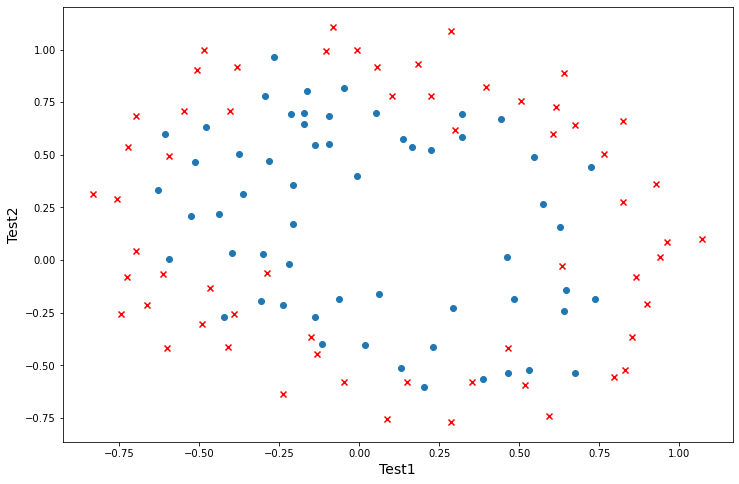

In [16]:
df1 = df[df['Accepted']==1]          #正样本
df1_new = df1.copy()
df2 = df[df['Accepted']==0]          #负样本
df2_new = df2.copy()
plt.figure(figsize=(12,8))
plt.scatter(df1['Test1'].values.tolist(),df1['Test2'].values.tolist(),marker='o')
plt.scatter(df2['Test1'].values.tolist(),df2['Test2'].values.tolist(),color='red',marker='x')
plt.xlabel('Test1',size=14)
plt.ylabel('Test2',size=14)
plt.show()

In [17]:
# 由于该数据不可以使用线性回归，因为不能直接使用一条直线进行分割
# 故不直接使用逻辑回归，我们增加数据集的高次项特征，增加到六次幂
degree = 6
data1 = df['Test1']
data2 = df['Test2']
df.insert(3,'Ones',1)
for i in range(1,degree+1):
    for j in range(0,i+1):
        # 默认增加到最后一列
        df['F'+str(i-j)+str(j)]=np.power(data1,i-j)*np.power(data2,j)
        pass
    pass
# 删除多余的两列，axis=1是删除列
df.drop('Test1',axis=1,inplace=True)
df.drop('Test2',axis=1,inplace=True)
df.head()

,Accepted,Ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [18]:
# 此时已准备好最高到6次幂的数据
# y只有下列这种取法才会生成向量
columns = df.shape[1]
X = df.iloc[:,1:columns]
y = df.iloc[:,0:1]
X = np.matrix(X.values)
y = np.matrix(y.values)

In [19]:
# 数据准备完成后，设计代价函数
def CostReg(theta,X,y,learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = -y.T*(np.log(sigmoid(X*theta.T)))
    second = (y.T-1)*(np.log(1-(sigmoid(X*theta.T))))
    third = learningRate*(np.sum(np.power(theta[:,1:],2)))/2
    return (first+second+third)/X.shape[0]
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg
theta = np.zeros(X.shape[1])
# 测试learningRate为0.1时theta为0时，整体的代价是多少
c = CostReg(theta,X,y,0.1)
c

matrix([[0.69314718]])

In [20]:
def gradient(theta,X,y,learningRate):
    # 返回该代价函数的梯度
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    # 首先初试化梯度皆为0，向量theta向量中每个数的梯度是不一样的，这里先初始化为0
    grad = np.zeros(theta.shape)
    error = sigmoid(X*theta.T)-y
    term = np.multiply(error,X)
    grad = np.sum(term,axis=0)/X.shape[0]
    grad[1:] = grad[1:] + learningRate*theta[1:]/X.shape[0]
    return grad
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad
theta = np.zeros(X.shape[1])
g = gradient(theta,X,y,0.1)
g

matrix([[8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
         1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
         8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
         1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
         4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
         3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
         4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02]])

In [21]:
# 调用函数库求解最佳的theta值
theta = np.zeros(X.shape[1])
learningRate = 0.4
result2 = opt.fmin_tnc(func=CostReg,x0=theta,fprime=gradient,args=(X,y,learningRate))
result2

(array([ 1.83273352,  1.32589885,  2.20964224, -3.46191974, -1.93582175,
        -2.27013683,  0.65751174, -0.78583324, -0.80701265,  0.02928876,
        -2.34833502, -0.20484364, -1.22229574, -0.58952606, -1.73433363,
         0.09123659, -0.42617517, -0.16635703, -0.55812596, -0.58351368,
        -0.28080671, -1.44625766,  0.02244675, -0.59556808, -0.03486153,
        -0.63060833, -0.2658628 , -1.04980804]),
 155,
 1)

In [22]:
# 看看准确度如何
theta_min = np.matrix(result2[0])
predictions = predict(theta_min,X)
correct = [1 if a==b else 0 for a,b in zip(predictions,y)]
accuracy = sum(correct)/len(correct)
'predict:{:.0%}'.format(accuracy)

# 就很迷下面这种写法居然精度超过100，是101%
# theta_min = np.matrix(result2[0])
# predictions = predict(theta_min, X)
# correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
# accuracy = (sum(map(int, correct)) % len(correct))
# print ('accuracy = {0}%'.format(accuracy))

'predict:86%'

In [23]:
# 画出决策线，这里挺麻烦的
def hfunc2(theta,x1,x2):
    theta = np.matrix(theta)
    temp = theta[0,0]
    place = 0
    for i in range(1,degree+1):
        for j in range(0,i+1):
            # 默认增加到最后一列
            temp += np.power(x1,i-j).multiply(np.power(x2,j))*theta[0,place+1]
            place+=1
            pass
        pass
    return temp
    pass


def find_decision_boundary(theta):
    t1 = np.linspace(-1,1.5,1000)
    t2 = np.linspace(-1,1.5,1000)
    
    cordinates = [(x,y) for x in t1 for y in t2]
    x_cord,y_cord = zip(*cordinates)
    h_val = pd.DataFrame({'x1':x_cord,'x2':y_cord})
    h_val['hval'] = hfunc2(theta,h_val['x1'],h_val['x2'])
    
    decision = h_val[np.abs(h_val['hval'])<2 * 10**-3]
    return decision['x1'],decision['x2']

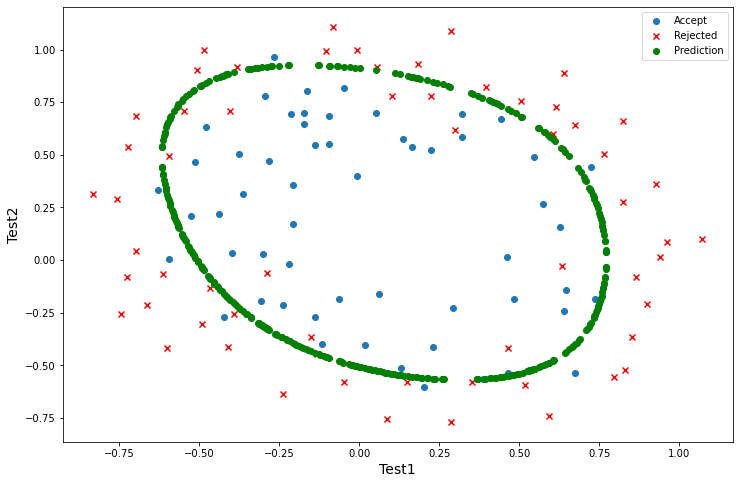

In [24]:
# 作图
_x,_y = find_decision_boundary(result2[0])
plt.subplots(figsize=(12,8))
plt.scatter(df1_new['Test1'].values.tolist(),df1_new['Test2'].values.tolist(),marker='o',label='Accept')
plt.scatter(df2_new['Test1'].values.tolist(),df2['Test2'].values.tolist(),color='red',marker='x',label='Rejected')
plt.scatter(_x,_y,color='green',marker='o',label='Prediction')
plt.xlabel('Test1',size=14)
plt.ylabel('Test2',size=14)
plt.legend(loc='best')
plt.show()